In [2]:
import requests

def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url).json()
    return response

concept_data_ko = get_conceptnet_data_ko("강아지")
print(concept_data_ko)

{'@context': ['http://api.conceptnet.io/ld/conceptnet5.7/context.ld.json'], '@id': '/c/ko/강아지', 'edges': [{'@id': '/a/[/r/RelatedTo/,/c/ko/강아지/n/,/c/en/puppy/]', '@type': 'Edge', 'dataset': '/d/wiktionary/en', 'end': {'@id': '/c/en/puppy', '@type': 'Node', 'label': 'puppy', 'language': 'en', 'term': '/c/en/puppy'}, 'license': 'cc:by-sa/4.0', 'rel': {'@id': '/r/RelatedTo', '@type': 'Relation', 'label': 'RelatedTo'}, 'sources': [{'@id': '/and/[/s/process/wikiparsec/2/,/s/resource/wiktionary/en/]', '@type': 'Source', 'contributor': '/s/resource/wiktionary/en', 'process': '/s/process/wikiparsec/2'}], 'start': {'@id': '/c/ko/강아지/n', '@type': 'Node', 'label': '강아지', 'language': 'ko', 'sense_label': 'n', 'term': '/c/ko/강아지'}, 'surfaceText': None, 'weight': 1.0}, {'@id': '/a/[/r/SymbolOf/,/c/mul/🐶/,/c/ko/강아지/]', '@type': 'Edge', 'dataset': '/d/emoji', 'end': {'@id': '/c/ko/강아지', '@type': 'Node', 'label': '강아지', 'language': 'ko', 'term': '/c/ko/강아지'}, 'license': 'cc:by/4.0', 'rel': {'@id': '/r/

In [3]:
import pandas as pd

def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf")):
    extracted = []
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],  # 개념 (예: "강아지")
                "relation": edge["rel"]["label"],  # 관계 (예: "IsA")
                "end": edge["end"]["label"]  # 연결된 개념 (예: "동물")
            })
    return pd.DataFrame(extracted)

# 데이터 필터링 (강아지 관련 데이터)
filtered_df_ko = extract_relations_ko(concept_data_ko)
print(filtered_df_ko)

  start   relation    end
0   강아지  RelatedTo  puppy
1     개  RelatedTo    강아지
2   강아지  RelatedTo  doggy
3   강아지  RelatedTo    dog
4   강아지  RelatedTo  chiot


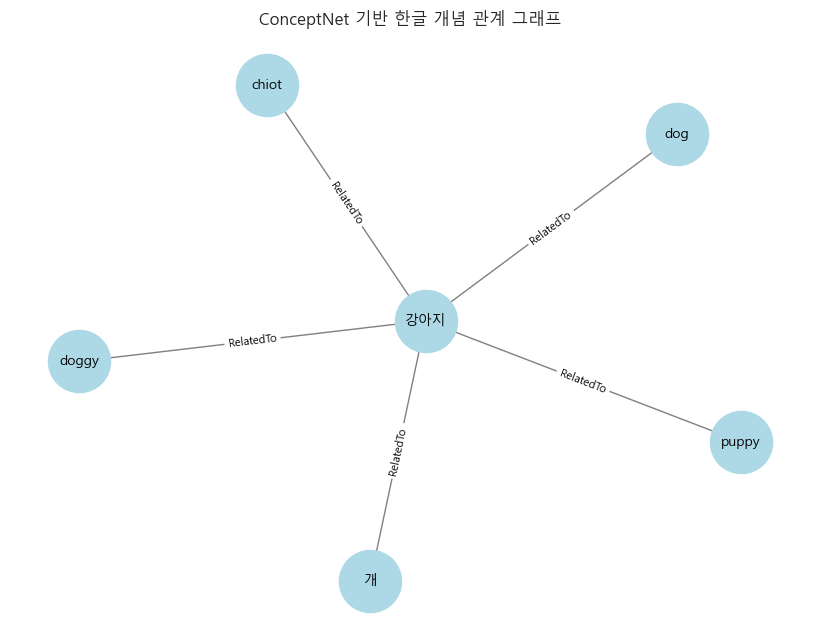

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 📌 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows 사용자

# 📌 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

def visualize_concept_graph_ko(df):
    """
    한국어 ConceptNet 데이터 관계를 네트워크 그래프로 시각화한다.

    :param df: 필터링된 관계 데이터프레임
    """
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["start"], row["end"], label=row["relation"])

    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    # 📌 한글 폰트 적용하여 그래프 그리기
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=10, node_size=2000, font_family='Malgun Gothic')

    # 관계(label) 표시
    labels = {(row["start"], row["end"]): row["relation"] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8, font_family='Malgun Gothic')

    plt.title("ConceptNet 기반 한글 개념 관계 그래프")
    plt.show()

# 🚀 예제 실행 (강아지 관련 개념 관계 그래프 그리기)
visualize_concept_graph_ko(filtered_df_ko)

In [5]:
def akinator_like_question_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if not df.empty:
        question = f"당신이 생각하는 개념은 '{df['end'].iloc[0]}'과(와) 관련이 있나요?"
        return question
    return "죄송합니다. 관련 개념을 찾을 수 없습니다."
print(akinator_like_question_ko("강아지"))

당신이 생각하는 개념은 'puppy'과(와) 관련이 있나요?


In [6]:
import requests
import pandas as pd

def get_conceptnet_data_ko(concept):
    """
    ConceptNet API를 사용하여 특정 개념(한국어)의 관련 데이터를 가져온다.

    :param concept: 검색할 개념 (예: "강아지")
    :return: JSON 형식의 개념 데이터
    """
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url).json()
    return response

def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf")):
    """
    ConceptNet 데이터에서 특정 관계 (예: "IsA", "RelatedTo")를 필터링하여 DataFrame으로 변환한다.

    :param concept_data: ConceptNet에서 가져온 JSON 데이터
    :param relations: 관심 있는 관계 리스트 (기본값: "IsA", "RelatedTo", "PartOf")
    :return: 필터링된 데이터프레임
    """
    extracted = []
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],  # 개념 (예: "강아지")
                "relation": edge["rel"]["label"],  # 관계 (예: "IsA")
                "end": edge["end"]["label"]  # 연결된 개념 (예: "동물")
            })
    return pd.DataFrame(extracted)

def akinator_ko(concept):
    """
    아키네이터 스타일의 질문-응답 시스템.

    :param concept: 시작 개념 (예: "강아지")
    """
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("죄송합니다. 관련 개념을 찾을 수 없습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")

    for i, row in df.iterrows():
        question = f"❓ 당신이 생각하는 개념은 '{row['end']}'과(와) 관련이 있나요? (예/아니오): "
        answer = input(question).strip().lower()

        if answer == "예" or answer == "yes":
            print(f"✅ 그렇군요! '{row['end']}'과 관련이 있군요.")
        elif answer == "아니오" or answer == "no":
            print(f"❌ '{row['end']}'과 관련이 없군요.")
        else:
            print("⚠️ 예/아니오로만 답해주세요.")
            continue  # 잘못된 입력 시 반복

    print("\n🎯 게임 종료! 당신이 생각한 개념은 아마도 '{}'일 것입니다.".format(concept))

# 🎮 아키네이터 스타일 게임 실행
akinator_ko("강아지")

🎮 아키네이터 게임 시작! (강아지)

✅ 그렇군요! 'puppy'과 관련이 있군요.
✅ 그렇군요! '강아지'과 관련이 있군요.
✅ 그렇군요! 'doggy'과 관련이 있군요.
✅ 그렇군요! 'dog'과 관련이 있군요.
⚠️ 예/아니오로만 답해주세요.

🎯 게임 종료! 당신이 생각한 개념은 아마도 '강아지'일 것입니다.


In [80]:
import requests
import pandas as pd
import random

# 🔹 ConceptNet API에서 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url).json()
    return response

# 🔹 관계 데이터 필터링 (IsA, RelatedTo, PartOf)
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf")):
    extracted = []
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })
    return pd.DataFrame(extracted)

# 🔹 개념을 자동으로 카테고리화
def categorize_concept(df):
    categories = {
        "동물": ["동물", "포유류", "곤충", "파충류", "어류", "조류", "개", "고양이"],
        "사람": ["사람", "직업", "가족", "유명인", "학생", "교사", "배우"],
        "사물": ["물건", "도구", "기계", "전자제품", "책", "컴퓨터", "핸드폰"],
        "음식": ["음식", "과일", "야채", "음료", "사과", "김치", "커피", "빵"],
        "기타": ["장소", "개념", "추상", "감정", "행복", "슬픔", "학교", "도시"]
    }

    categorized = {key: [] for key in categories.keys()}
    unclassified = []  # 카테고리에 없는 개념을 따로 저장

    for _, row in df.iterrows():
        found = False
        for category, keywords in categories.items():
            if row["end"] in keywords:
                categorized[category].append(row["end"])
                found = True
                break
        if not found:
            unclassified.append(row["end"])

    if unclassified:
        categorized["기타"].extend(unclassified)  # '기타' 카테고리 추가

    return categorized

# 🔹 아키네이터 스타일 질문-응답 시스템 (모든 카테고리 포함)
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    categorized_data = categorize_concept(df)

    # 각 카테고리에서 개념이 1개 이상 있는지 확인
    if all(len(v) == 0 for v in categorized_data.values()):
        print("❌ 유효한 개념을 찾지 못했습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")

    final_candidates = []  # 최종 후보 개념

    # 랜덤하게 카테고리 순서를 섞어서 질문이 골고루 나오도록 함
    categories_list = list(categorized_data.keys())
    random.shuffle(categories_list)

    for category in categories_list:
        concepts = categorized_data[category]
        if not concepts:
            continue

        question = f"❓ 당신이 생각하는 개념은 '{category}' 카테고리에 속하나요? (예/아니오): "
        answer = input(question).strip().lower()

        if answer == "예" or answer == "yes":
            print(f"✅ '{category}' 카테고리를 선택했습니다.")
            final_candidates.extend(concepts)
        elif answer == "아니오" or answer == "no":
            print(f"❌ '{category}' 카테고리를 제외합니다.")

    if final_candidates:
        random.shuffle(final_candidates)  # 개념 질문 순서를 랜덤화
        for concept in final_candidates:
            question = f"❓ 당신이 생각하는 개념은 '{concept}'인가요? (예/아니오): "
            answer = input(question).strip().lower()
            if answer == "예" or answer == "yes":
                print(f"🎯 정답! 당신이 생각한 개념은 '{concept}'입니다! 🎉")
                return

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 🎮 아키네이터 스타일 게임 실행
akinator_ko("축구")

🎮 아키네이터 게임 시작! (축구)

✅ '기타' 카테고리를 선택했습니다.
🎯 정답! 당신이 생각한 개념은 'soccer'입니다! 🎉


🎮 아키네이터 게임 시작! (재즈)

✅ '노래 장르' 카테고리를 선택했습니다.
🎯 정답! 당신이 생각한 개념은 'jazz'입니다! 🎉


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


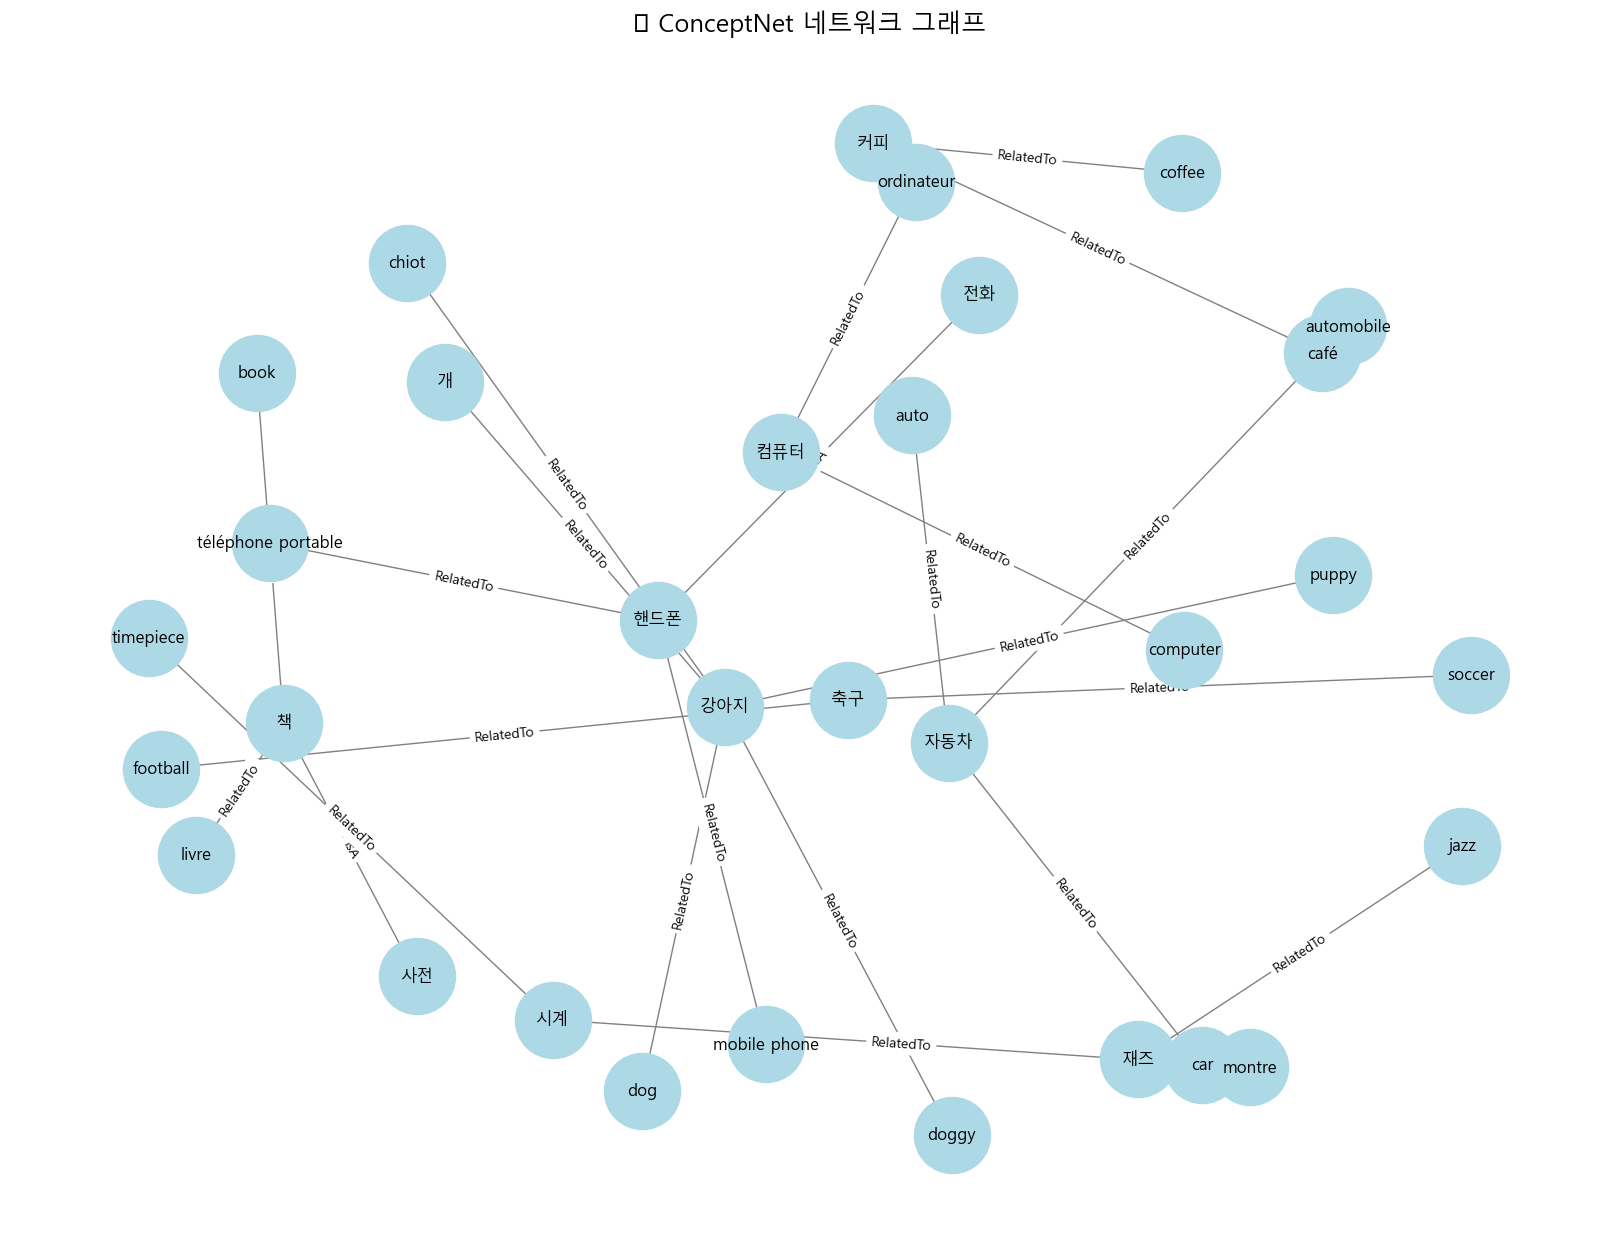

In [91]:
import requests
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

# 📌 한글 폰트 설정 (맑은 고딕)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# 🔹 ConceptNet API에서 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"⚠️ API 요청 실패: {response.status_code}")
        return {}
    return response.json()

# 🔹 관계 데이터 필터링 (더 많은 관계 포함)
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf", "HasA", "UsedFor", "AtLocation")):
    extracted = []
    if "edges" not in concept_data:
        return pd.DataFrame(columns=["start", "relation", "end"])

    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })

    return pd.DataFrame(extracted)

# 🔹 개념을 자동으로 카테고리화
def categorize_concept(df):
    categories = {
        "동물": ["동물", "포유류", "곤충", "파충류", "어류", "조류", "개", "고양이", "코끼리", "호랑이"],
        "사람": ["사람", "직업", "가족", "유명인", "학생", "교사", "배우", "운동선수"],
        "사물": ["물건", "도구", "기계", "전자제품", "책", "컴퓨터", "핸드폰", "자동차", "시계"],
        "음식": ["음식", "과일", "야채", "음료", "사과", "김치", "커피", "빵", "피자"],
        "스포츠": ["축구", "농구", "야구", "배구", "테니스", "골프"],
        "노래 장르": ["팝", "락", "힙합", "클래식", "재즈", "발라드"],
        "게임": ["롤", "배그", "마인크래프트", "스타크래프트", "포켓몬"],
        "기타": ["장소", "개념", "추상", "감정", "행복", "슬픔", "학교", "도시"]
    }
    categorized = {key: [] for key in categories.keys()}
    unclassified = []

    for _, row in df.iterrows():
        found = False
        for category, keywords in categories.items():
            if row["end"] in keywords:
                categorized[category].append(row["end"])
                found = True
                break
        if not found:
            unclassified.append(row["end"])

    if unclassified:
        categorized["노래 장르"].extend(unclassified)
    return categorized

# 🔹 ConceptNet 데이터를 수집하여 하나의 DataFrame으로 결합
def get_combined_concept_data(concept_list):
    combined_data = []
    for concept in concept_list:
        data = get_conceptnet_data_ko(concept)
        df = extract_relations_ko(data)
        if not df.empty:
            combined_data.append(df)

    if combined_data:
        return pd.concat(combined_data, ignore_index=True)
    else:
        return pd.DataFrame(columns=["start", "relation", "end"])

# 🔹 네트워크 그래프 시각화
def visualize_concept_graph(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return

    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["start"], row["end"], label=row["relation"])

    plt.figure(figsize=(16, 12))  # 🔹 그래프 크기 확대
    pos = nx.spring_layout(G, k=1.0)  # 🔹 노드 간 간격을 넓힘
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=12, node_size=3000)

    edge_labels = {(row["start"], row["end"]): row["relation"] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.title("🕸 ConceptNet 네트워크 그래프", fontsize=18)
    plt.show()

def visualize_concept_frequencies(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return

    # 🔹 개념별 빈도수 계산
    concept_counts = Counter(df["end"])

    # 🔹 데이터프레임 변환
    freq_df = pd.DataFrame(concept_counts.items(), columns=["개념", "빈도수"])
    freq_df = freq_df.sort_values(by="빈도수", ascending=False)

    # 🔹 Seaborn 막대그래프 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(x="빈도수", y="개념", data=freq_df, palette="Blues_r")

    plt.xlabel("등장 빈도수", fontsize=12)
    plt.ylabel("개념", fontsize=12)
    plt.title("📊 개념 등장 빈도수", fontsize=15)
    plt.show()

def generate_wordcloud(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return

    # 🔹 개념별 빈도수 계산
    concept_counts = Counter(df["end"])

    # 🔹 워드 클라우드 생성
    wordcloud = WordCloud(
        font_path="malgun.ttf",  # 한글 폰트 지정
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(concept_counts)

    # 🔹 워드 클라우드 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("☁️ 개념 워드 클라우드", fontsize=15)
    plt.show()

# 🔹 아키네이터 스타일 질문-응답 시스템
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    categorized_data = categorize_concept(df)

    # 각 카테고리에서 개념이 1개 이상 있는지 확인
    if all(len(v) == 0 for v in categorized_data.values()):
        print("❌ 유효한 개념을 찾지 못했습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")

    final_candidates = []  # 최종 후보 개념

    # 랜덤하게 카테고리 순서를 섞어서 질문이 골고루 나오도록 함
    categories_list = list(categorized_data.keys())
    random.shuffle(categories_list)

    for category in categories_list:
        concepts = categorized_data[category]
        if not concepts:
            continue

        question = f"❓ 당신이 생각하는 개념은 '{category}' 카테고리에 속하나요? (예/아니오): "
        answer = input(question).strip().lower()

        if answer == "예" or answer == "yes":
            print(f"✅ '{category}' 카테고리를 선택했습니다.")
            final_candidates.extend(concepts)
        elif answer == "아니오" or answer == "no":
            print(f"❌ '{category}' 카테고리를 제외합니다.")

    if final_candidates:
        random.shuffle(final_candidates)  # 개념 질문 순서를 랜덤화
        for concept in final_candidates:
            question = f"❓ 당신이 생각하는 개념은 '{concept}'인가요? (예/아니오): "
            answer = input(question).strip().lower()
            if answer == "예" or answer == "yes":
                print(f"🎯 정답! 당신이 생각한 개념은 '{concept}'입니다! 🎉")
                return

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 🎮 게임 실행
akinator_ko("재즈")

# 🔹 데이터 시각화
df = get_combined_concept_data(["핸드폰", "컴퓨터", "책", "자동차", "시계", "축구", "롤", "커피", "재즈", "강아지"])
visualize_concept_graph(df)


🎮 아키네이터 게임 시작! (고양이)

✅ '동물' 카테고리를 선택했습니다.
🎯 정답! 당신이 생각한 개념은 '고양이'입니다! 🎉


C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54648 (\N{HANGUL SYLLABLE HAEN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54256 (\N{HANGUL SYLLABLE PON}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE 

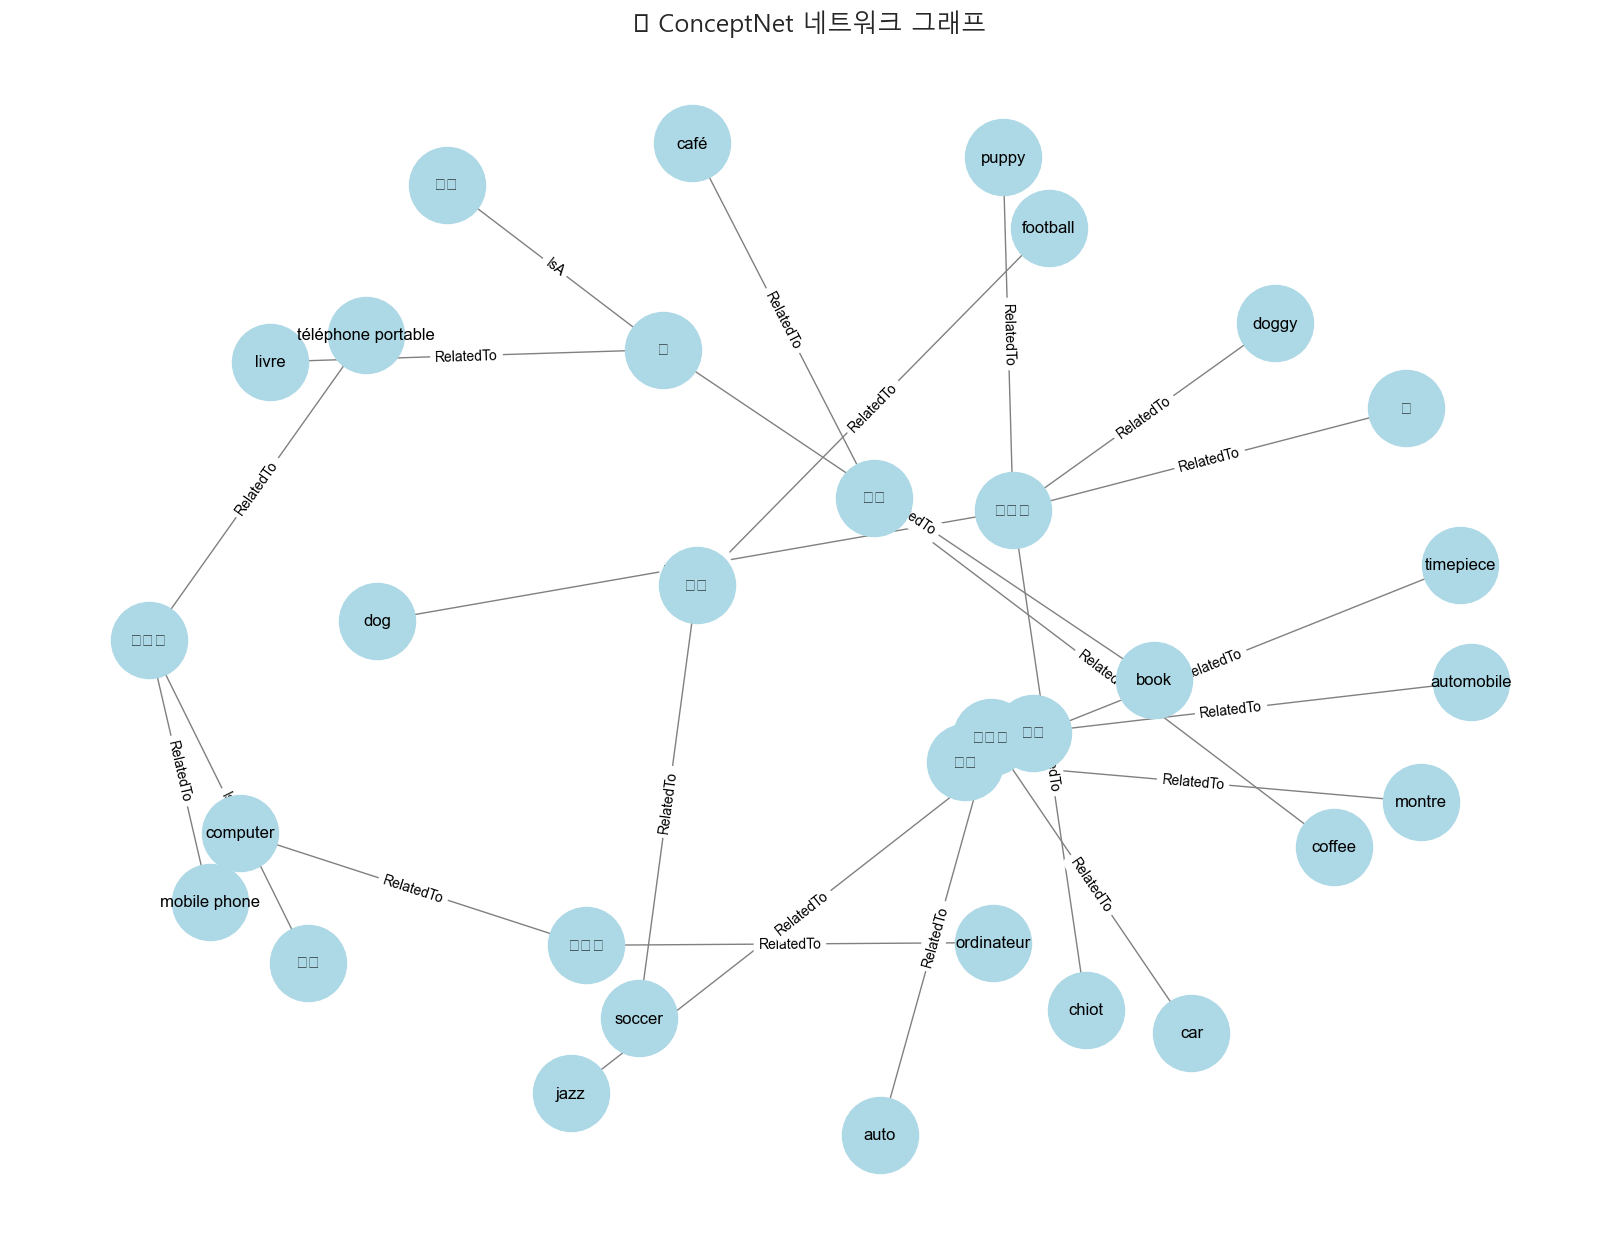

C:\Users\admin\AppData\Local\Temp\ipykernel_12740\3455234316.py:131: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "wordcloud.png"))
C:\Users\admin\AppData\Local\Temp\ipykernel_12740\3455234316.py:131: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "wordcloud.png"))
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


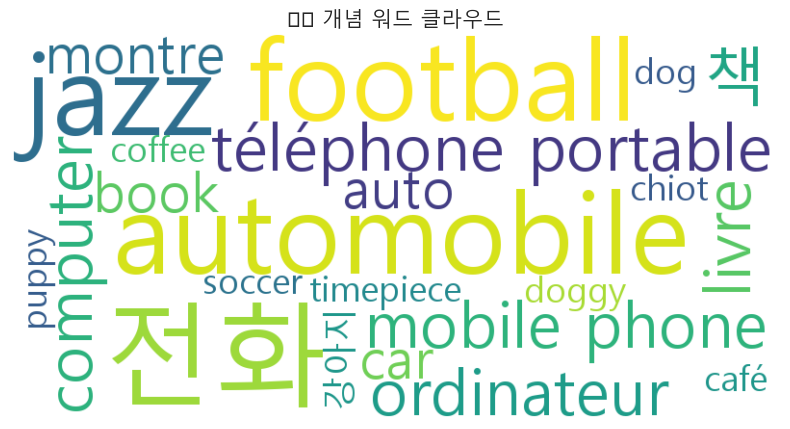

C:\Users\admin\AppData\Local\Temp\ipykernel_12740\3455234316.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="coolwarm")
C:\Users\admin\AppData\Local\Temp\ipykernel_12740\3455234316.py:141: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "bar_chart.png"))
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


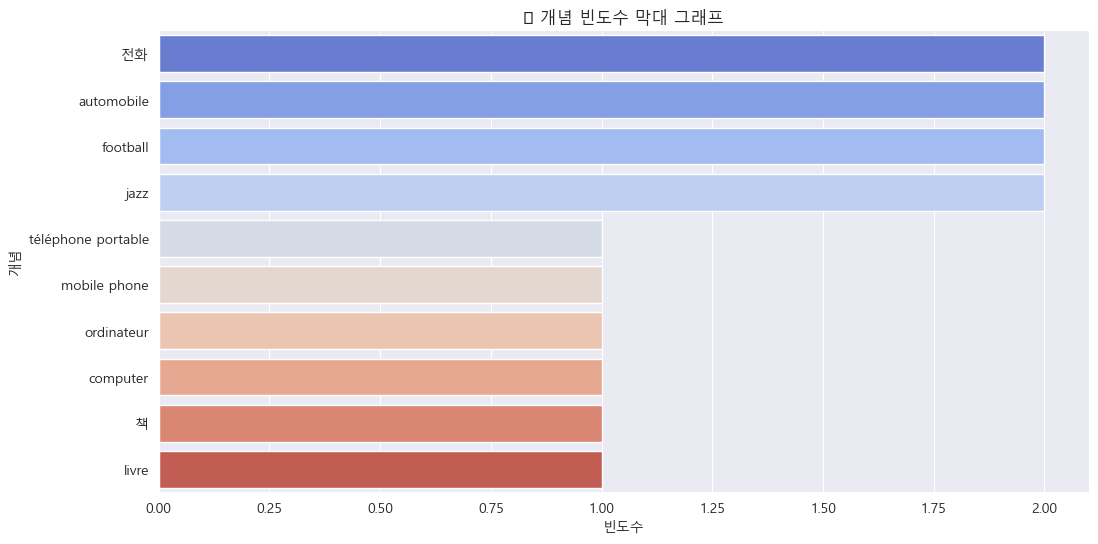

In [13]:
import requests
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import os

# 📌 한글 폰트 자동 설정
font_path = "C:/Windows/Fonts/malgun.ttf" if os.name == "nt" else "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
if os.path.exists(font_path):
    plt.rc("font", family="Malgun Gothic" if os.name == "nt" else "NanumGothic")
plt.rcParams["axes.unicode_minus"] = False

# 🔹 저장할 폴더 생성
save_dir = "output_images"
os.makedirs(save_dir, exist_ok=True)

# ConceptNet API 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"⚠️ API 요청 실패: {response.status_code}")
        return {}
    return response.json()

# 관계 데이터 필터링
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf", "HasA", "UsedFor", "AtLocation")):
    extracted = []
    if "edges" not in concept_data:
        return pd.DataFrame(columns=["start", "relation", "end"])
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })
    return pd.DataFrame(extracted)

# ConceptNet 데이터 수집
def get_combined_concept_data(concept_list):
    combined_data = []
    for concept in concept_list:
        data = get_conceptnet_data_ko(concept)
        df = extract_relations_ko(data)
        if not df.empty:
            combined_data.append(df)
    return pd.concat(combined_data, ignore_index=True) if combined_data else pd.DataFrame(columns=["start", "relation", "end"])

# 아키네이터 스타일 질문-응답 시스템
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    categorized_data = categorize_concept(df)

    if all(len(v) == 0 for v in categorized_data.values()):
        print("❌ 유효한 개념을 찾지 못했습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")
    final_candidates = []
    categories_list = list(categorized_data.keys())
    random.shuffle(categories_list)

    for category in categories_list:
        concepts = categorized_data[category]
        if not concepts:
            continue

        question = f"❓ 당신이 생각하는 개념은 '{category}' 카테고리에 속하나요? (예/아니오): "
        answer = input(question).strip().lower()

        if answer in ["예", "yes"]:
            print(f"✅ '{category}' 카테고리를 선택했습니다.")
            final_candidates.extend(concepts)
        elif answer in ["아니오", "no"]:
            print(f"❌ '{category}' 카테고리를 제외합니다.")

    if final_candidates:
        random.shuffle(final_candidates)
        for concept in final_candidates:
            question = f"❓ 당신이 생각하는 개념은 '{concept}'인가요? (예/아니오): "
            answer = input(question).strip().lower()
            if answer in ["예", "yes"]:
                print(f"🎯 정답! 당신이 생각한 개념은 '{concept}'입니다! 🎉")
                return

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 실행 예제
akinator_ko("고양이")


# 🔹 네트워크 그래프 시각화
def visualize_concept_graph(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return None
    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["start"], row["end"], label=row["relation"])
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=1.0)
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", font_size=12, node_size=3000)
    edge_labels = {(row["start"], row["end"]): row["relation"] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    plt.title("🕸 ConceptNet 네트워크 그래프", fontsize=18)
    plt.show()
    return G

# 🔹 워드 클라우드 & 막대 그래프 생성
def generate_wordcloud_and_bar(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return
    concept_counts = Counter(df["end"])
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(concept_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("☁️ 개념 워드 클라우드", fontsize=15)
    plt.savefig(os.path.join(save_dir, "wordcloud.png"))
    plt.show()
    # 🔹 막대 그래프 추가
    sorted_counts = concept_counts.most_common(10)
    labels, values = zip(*sorted_counts)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(values), y=list(labels), palette="coolwarm")
    plt.xlabel("빈도수")
    plt.ylabel("개념")
    plt.title("📊 개념 빈도수 막대 그래프")
    plt.savefig(os.path.join(save_dir, "bar_chart.png"))
    plt.show()

# 🔹 실행
df = get_combined_concept_data(["핸드폰", "컴퓨터", "책", "자동차", "시계", "축구", "롤", "커피", "재즈", "강아지"])
G = visualize_concept_graph(df)
generate_wordcloud_and_bar(df)

In [ ]:
import requests
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import os
import matplotlib.font_manager as fm

# 📌 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf" if os.name == "nt" else "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 📌 폰트 설정
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("⚠️ 폰트 파일을 찾을 수 없습니다. 기본 설정을 사용합니다.")
    font_prop = None

# 🔹 저장할 폴더 생성
save_dir = "output_images"
os.makedirs(save_dir, exist_ok=True)

# 🔹 카테고리별 개념 목록
concept_categories = {
    "전자제품": ["핸드폰", "컴퓨터", "태블릿", "스마트워치"],
    "교통수단": ["자동차", "자전거", "비행기", "기차"],
    "취미": ["축구", "농구", "롤", "재즈"],
    "음식": ["커피", "초콜릿", "피자", "라면"],
    "동물": ["강아지", "고양이", "토끼", "코끼리"]
}

# 🔹 랜덤 개념 선택 함수
def get_random_concepts(n=3):
    selected_concepts = []
    categories = list(concept_categories.keys())
    random.shuffle(categories)

    while len(selected_concepts) < n:
        category = random.choice(categories)
        concept = random.choice(concept_categories[category])
        if concept not in selected_concepts:
            selected_concepts.append(concept)

    return selected_concepts

# ConceptNet API 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"⚠️ API 요청 실패: {response.status_code}")
        return {}
    return response.json()

# 관계 데이터 필터링
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf", "HasA", "UsedFor", "AtLocation")):
    extracted = []
    if "edges" not in concept_data:
        return pd.DataFrame(columns=["start", "relation", "end"])
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })
    return pd.DataFrame(extracted)

# ConceptNet 데이터 수집
def get_combined_concept_data(concept_list):
    combined_data = []
    for concept in concept_list:
        data = get_conceptnet_data_ko(concept)
        df = extract_relations_ko(data)
        if not df.empty:
            combined_data.append(df)
    return pd.concat(combined_data, ignore_index=True) if combined_data else pd.DataFrame(columns=["start", "relation", "end"])

# 🔹 아키네이터 스타일 질문-응답 시스템 (랜덤 질문 적용)
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")
    final_candidates = list(df["end"].unique())
    random.shuffle(final_candidates)

    asked_questions = set()
    while final_candidates:
        candidate = random.choice(final_candidates)
        if candidate in asked_questions:
            continue
        asked_questions.add(candidate)

        question = f"❓ 당신이 생각하는 개념은 '{candidate}'인가요? (예/아니오): "
        answer = input(question).strip().lower()
        if answer in ["예", "yes"]:
            print(f"🎯 정답! 당신이 생각한 개념은 '{candidate}'입니다! 🎉")
            return

        final_candidates.remove(candidate)

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 🔹 실행
random_concepts = get_random_concepts()
df = get_combined_concept_data(random_concepts)
G = visualize_concept_graph(df)
generate_wordcloud_and_bar(df)

# 🔹 아키네이터 실행
random_akinator_concept = random.choice(random_concepts)
akinator_ko(random_akinator_concept)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


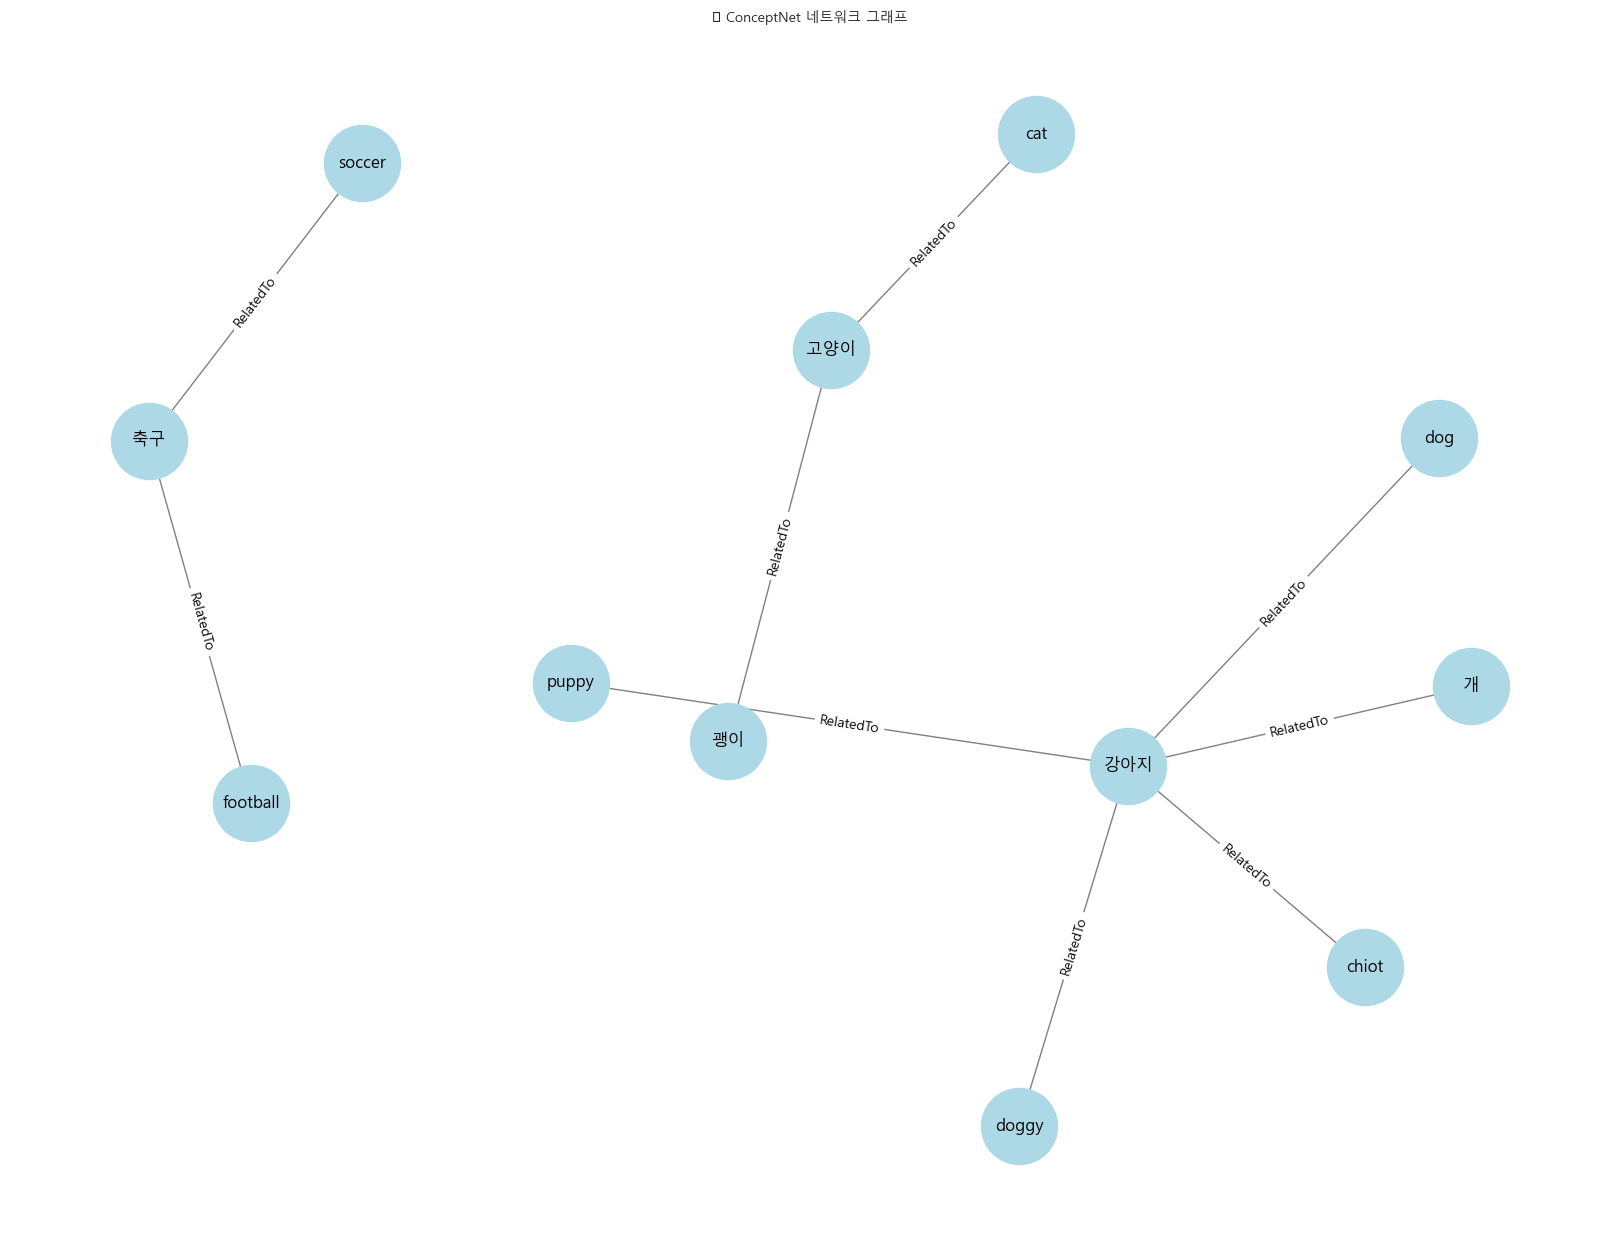

C:\Users\admin\AppData\Local\Temp\ipykernel_12740\131598019.py:140: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "wordcloud.png"))
C:\Users\admin\AppData\Local\Temp\ipykernel_12740\131598019.py:140: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "wordcloud.png"))
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


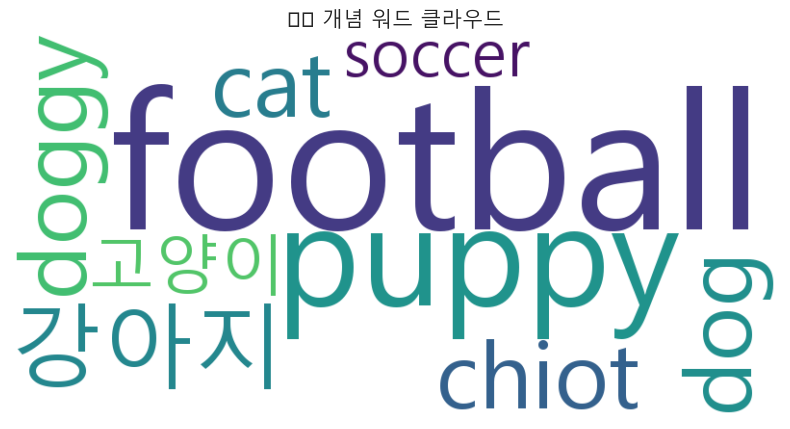

C:\Users\admin\AppData\Local\Temp\ipykernel_12740\131598019.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(values), y=list(labels), palette="coolwarm")
C:\Users\admin\AppData\Local\Temp\ipykernel_12740\131598019.py:150: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  plt.savefig(os.path.join(save_dir, "bar_chart.png"))
C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


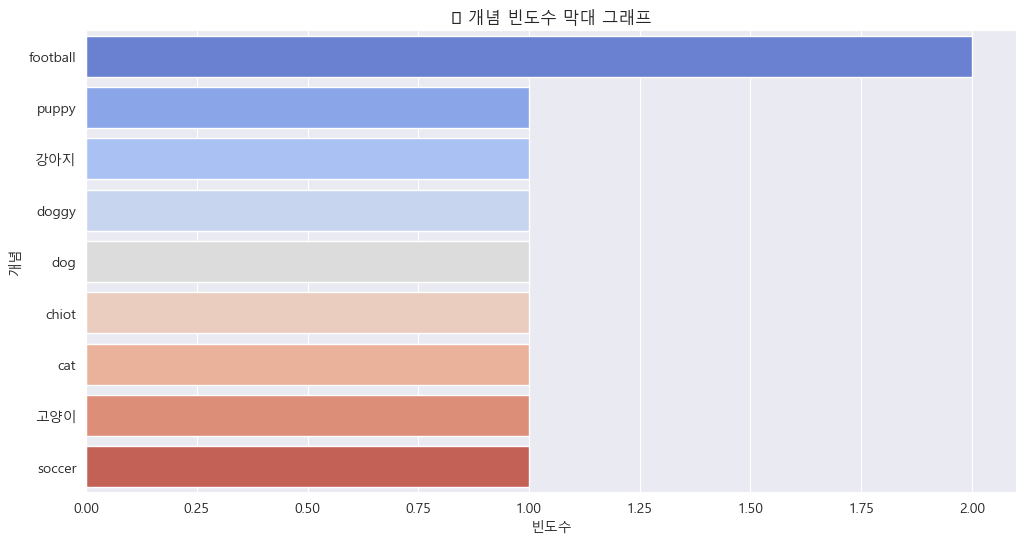

🎮 아키네이터 게임 시작! (강아지)

🎯 정답! 당신이 생각한 개념은 'doggy'입니다! 🎉


In [20]:
import requests
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import os
import matplotlib.font_manager as fm

# 📌 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf" if os.name == "nt" else "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 📌 폰트 설정
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("⚠️ 폰트 파일을 찾을 수 없습니다. 기본 설정을 사용합니다.")
    font_prop = None

# 🔹 저장할 폴더 생성
save_dir = "output_images"
os.makedirs(save_dir, exist_ok=True)

# 🔹 카테고리별 개념 목록
concept_categories = {
    "전자제품": ["핸드폰", "컴퓨터", "태블릿", "스마트워치"],
    "교통수단": ["자동차", "자전거", "비행기", "기차"],
    "취미": ["축구", "농구", "롤", "재즈"],
    "음식": ["커피", "초콜릿", "피자", "라면"],
    "동물": ["강아지", "고양이", "토끼", "코끼리"]
}

# 🔹 랜덤 개념 선택 함수
def get_random_concepts(n=3):
    selected_concepts = []
    categories = list(concept_categories.keys())
    random.shuffle(categories)

    while len(selected_concepts) < n:
        category = random.choice(categories)
        concept = random.choice(concept_categories[category])
        if concept not in selected_concepts:
            selected_concepts.append(concept)

    return selected_concepts

# ConceptNet API 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"⚠️ API 요청 실패: {response.status_code}")
        return {}
    return response.json()

# 관계 데이터 필터링
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf", "HasA", "UsedFor", "AtLocation")):
    extracted = []
    if "edges" not in concept_data:
        return pd.DataFrame(columns=["start", "relation", "end"])
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })
    return pd.DataFrame(extracted)

# ConceptNet 데이터 수집
def get_combined_concept_data(concept_list):
    combined_data = []
    for concept in concept_list:
        data = get_conceptnet_data_ko(concept)
        df = extract_relations_ko(data)
        if not df.empty:
            combined_data.append(df)
    return pd.concat(combined_data, ignore_index=True) if combined_data else pd.DataFrame(columns=["start", "relation", "end"])

# 🔹 아키네이터 스타일 질문-응답 시스템
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")
    final_candidates = list(df["end"].unique())
    random.shuffle(final_candidates)

    for concept in final_candidates:
        question = f"❓ 당신이 생각하는 개념은 '{concept}'인가요? (예/아니오): "
        answer = input(question).strip().lower()
        if answer in ["예", "yes"]:
            print(f"🎯 정답! 당신이 생각한 개념은 '{concept}'입니다! 🎉")
            return

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 🔹 네트워크 그래프 시각화 함수 수정
def visualize_concept_graph(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return None

    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["start"], row["end"], label=row["relation"])

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=1.0)

    # 🎨 노드 및 엣지 시각화
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
            font_size=12, node_size=3000, font_family=font_prop.get_name() if font_prop else "sans-serif")

    # 🎨 엣지 레이블 추가
    edge_labels = {(row["start"], row["end"]): row["relation"] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family=font_prop.get_name() if font_prop else "sans-serif")

    plt.title("🕸 ConceptNet 네트워크 그래프", fontsize=18, fontproperties=font_prop)
    plt.show()
    return G

# 🔹 워드 클라우드 & 막대 그래프 생성
def generate_wordcloud_and_bar(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return
    concept_counts = Counter(df["end"])
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(concept_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("☁️ 개념 워드 클라우드", fontsize=15)
    plt.savefig(os.path.join(save_dir, "wordcloud.png"))
    plt.show()

    sorted_counts = concept_counts.most_common(10)
    labels, values = zip(*sorted_counts)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(values), y=list(labels), palette="coolwarm")
    plt.xlabel("빈도수")
    plt.ylabel("개념")
    plt.title("📊 개념 빈도수 막대 그래프")
    plt.savefig(os.path.join(save_dir, "bar_chart.png"))
    plt.show()

# 🔹 실행
random_concepts = get_random_concepts()
df = get_combined_concept_data(random_concepts)
G = visualize_concept_graph(df)
generate_wordcloud_and_bar(df)

# 🔹 아키네이터 실행
random_akinator_concept = random.choice(random_concepts)
akinator_ko(random_akinator_concept)

In [23]:
import requests
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import os
import matplotlib.font_manager as fm
import json

# 📌 한글 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf" if os.name == "nt" else "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 📌 폰트 설정
if os.path.exists(font_path):
    font_prop = fm.FontProperties(fname=font_path)
else:
    print("⚠️ 폰트 파일을 찾을 수 없습니다. 기본 설정을 사용합니다.")
    font_prop = None

# 🔹 저장할 폴더 생성
save_dir = "output_images"
os.makedirs(save_dir, exist_ok=True)

# 🔹 질문 데이터 로드
question_file = "questions.json"
if os.path.exists(question_file):
    with open(question_file, "r", encoding="utf-8") as f:
        question_data = json.load(f)
else:
    question_data = {}

# 🔹 카테고리별 개념 목록
concept_categories = {
    "전자제품": ["핸드폰", "컴퓨터", "태블릿", "스마트워치"],
    "교통수단": ["자동차", "자전거", "비행기", "기차"],
    "취미": ["축구", "농구", "롤", "재즈"],
    "음식": ["커피", "초콜릿", "피자", "라면"],
    "동물": ["강아지", "고양이", "토끼", "코끼리"]
}

# 🔹 랜덤 개념 선택 함수
def get_random_concepts(n=3):
    selected_concepts = []
    categories = list(concept_categories.keys())
    random.shuffle(categories)

    while len(selected_concepts) < n:
        category = random.choice(categories)
        concept = random.choice(concept_categories[category])
        if concept not in selected_concepts:
            selected_concepts.append(concept)

    return selected_concepts

# ConceptNet API 데이터 가져오기
def get_conceptnet_data_ko(concept):
    url = f"https://api.conceptnet.io/c/ko/{concept}"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"⚠️ API 요청 실패: {response.status_code}")
        return {}
    return response.json()

# 관계 데이터 필터링
def extract_relations_ko(concept_data, relations=("IsA", "RelatedTo", "PartOf", "HasA", "UsedFor", "AtLocation")):
    extracted = []
    if "edges" not in concept_data:
        return pd.DataFrame(columns=["start", "relation", "end"])
    for edge in concept_data["edges"]:
        if edge["rel"]["label"] in relations:
            extracted.append({
                "start": edge["start"]["label"],
                "relation": edge["rel"]["label"],
                "end": edge["end"]["label"]
            })
    return pd.DataFrame(extracted)

# ConceptNet 데이터 수집
def get_combined_concept_data(concept_list):
    combined_data = []
    for concept in concept_list:
        data = get_conceptnet_data_ko(concept)
        df = extract_relations_ko(data)
        if not df.empty:
            combined_data.append(df)
    return pd.concat(combined_data, ignore_index=True) if combined_data else pd.DataFrame(columns=["start", "relation", "end"])

# 🔹 아키네이터 스타일 질문-응답 시스템
def akinator_ko(concept):
    data = get_conceptnet_data_ko(concept)
    df = extract_relations_ko(data)

    if df.empty:
        print("❌ 관련 개념을 찾을 수 없습니다.")
        return

    print(f"🎮 아키네이터 게임 시작! ({concept})\n")
    final_candidates = list(df["end"].unique())
    random.shuffle(final_candidates)

    for concept in final_candidates:
        question = f"❓ 당신이 생각하는 개념은 '{concept}'인가요? (예/아니오): "
        answer = input(question).strip().lower()
        if answer in ["예", "yes"]:
            print(f"🎯 정답! 당신이 생각한 개념은 '{concept}'입니다! 🎉")
            return

    print("\n🎯 게임 종료! 정확한 개념을 찾지 못했습니다. 😢")

# 🔹 네트워크 그래프 시각화 함수 수정
def visualize_concept_graph(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return None

    G = nx.Graph()
    for _, row in df.iterrows():
        G.add_edge(row["start"], row["end"], label=row["relation"])

    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=1.0)

    # 🎨 노드 및 엣지 시각화
    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
            font_size=12, node_size=3000, font_family=font_prop.get_name() if font_prop else "sans-serif")

    # 🎨 엣지 레이블 추가
    edge_labels = {(row["start"], row["end"]): row["relation"] for _, row in df.iterrows()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family=font_prop.get_name() if font_prop else "sans-serif")

    plt.title("🕸 ConceptNet 네트워크 그래프", fontsize=18, fontproperties=font_prop)
    plt.show()
    return G

# 🔹 워드 클라우드 & 막대 그래프 생성
def generate_wordcloud_and_bar(df):
    if df.empty:
        print("⚠️ 시각화할 데이터가 없습니다.")
        return
    concept_counts = Counter(df["end"])
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color="white").generate_from_frequencies(concept_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("☁️ 개념 워드 클라우드", fontsize=15)
    plt.savefig(os.path.join(save_dir, "wordcloud.png"))
    plt.show()

    sorted_counts = concept_counts.most_common(10)
    labels, values = zip(*sorted_counts)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(values), y=list(labels), palette="coolwarm")
    plt.xlabel("빈도수")
    plt.ylabel("개념")
    plt.title("📊 개념 빈도수 막대 그래프")
    plt.savefig(os.path.join(save_dir, "bar_chart.png"))
    plt.show()


# 🔹 실행
random_concepts = get_random_concepts()
df = get_combined_concept_data(random_concepts)

# 🔹 아키네이터 실행
random_akinator_concept = random.choice(random_concepts)
akinator_ko(random_akinator_concept)

🎮 아키네이터 게임 시작! (코끼리)

🎯 정답! 당신이 생각한 개념은 'elephant'입니다! 🎉
